# 1월 13일

## 개인 수입 예측 basline만들기
1. 데이터로드
2. 수치형 컬럼 선택
3. X(문제), y(답) 나누기
4. 모델 선택 및 학습하기
5. 예측 결과 업로드

In [461]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. 데이터 로드

In [462]:
train = pd.read_csv("train.csv") # 훈련용데이터(문제, 답) 
test = pd.read_csv("test.csv") # 평가용데이터(사람의 특징만 들어있음)
submission = pd.read_csv("sample_submission.csv") # 업로드 양식

In [463]:
train.shape, test.shape # 약 2만9천명의 수입이 5만달러 이상인지 이하인지가 들어있는 데이터

((29305, 16), (19537, 15))

### 2. 수치형 컬럼 선택
- 숫자로 되어있는 컬럼 선택

In [464]:
train.info() 
# 전체 데이터 정보 간략하게 확인
# 숫자형 데이터 : no, age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week // income(은 정답 데이터)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   no              29305 non-null  int64 
 1   age             29305 non-null  int64 
 2   workclass       29305 non-null  object
 3   fnlwgt          29305 non-null  int64 
 4   education       29305 non-null  object
 5   education-num   29305 non-null  int64 
 6   marital-status  29305 non-null  object
 7   occupation      29305 non-null  object
 8   relationship    29305 non-null  object
 9   race            29305 non-null  object
 10  sex             29305 non-null  object
 11  capital-gain    29305 non-null  int64 
 12  capital-loss    29305 non-null  int64 
 13  hours-per-week  29305 non-null  int64 
 14  native-country  29305 non-null  object
 15  income          29305 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 3.6+ MB


In [516]:
train.columns

Index(['age', 'workclass', 'fnlwgt', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'hours-per-week',
       'native-country', 'income', 'capital'],
      dtype='object')

In [517]:
# 수치형 데이터에 해당되는 컬럼들만 골라 담아 준다
feature_names = ['age', 'workclass', 'fnlwgt', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'hours-per-week',
       'native-country', 'capital']

### X(문제), y(답) 나누기

In [518]:
# 색인할때 보통 tarin['age'] 이런식으로 하는데
# 동시에 여러개의 컬럼 색인하려면
# train[['age', 'no']] 이런식으로 하면 된다

In [533]:
# 정답인 income을 제외한 수치형 데이터 들만 추출
feature_names

['age',
 'workclass',
 'fnlwgt',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'hours-per-week',
 'native-country',
 'capital']

In [534]:
X_train = train[feature_names]
y_train = train['income']

### 4. 모델 선택 및 학습하기

In [521]:
# 이번 케글 문제 봤을때 수입이 넘냐 안넘냐 두가지 이기 때문에, 이진 분류 모델이 좋다는 걸 알 수 있다

In [522]:
from sklearn.linear_model import LogisticRegression # 분류 선형모델

In [523]:
logi_model = LogisticRegression()

In [524]:
logi_model.fit(X_train, y_train)

LogisticRegression()

In [525]:
logi_model.score(X_train, y_train)

0.7952909059887391

### 5. 예측 결과 업로드

In [526]:
X_test = test[feature_names] # 평가용 데이터셋 구축

In [527]:
logi_pre = logi_model.predict(X_test)
logi_pre

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [528]:
submission # 원래 양식

,no,income
0,29306,0
1,29307,0
2,29308,0
3,29309,0
4,29310,0
...,...,...
19532,48838,1
19533,48839,0
19534,48840,1
19535,48841,0


In [529]:
submission['income'] = logi_pre # 원래 양식의 income자리에 내가 예상한 값인 logi_pre를 대입해준다

In [530]:
submission

,no,income
0,29306,0
1,29307,0
2,29308,0
3,29309,0
4,29310,0
...,...,...
19532,48838,0
19533,48839,0
19534,48840,1
19535,48841,0


In [531]:
submission.to_csv('mySecondSubmission.csv', index = False) 
# index = False를 해줘야 앞에 0~19536이라는 인덱스가 사라져서 제출 양식에 맞게 된다.
# 붙어 있으면 제출 양식에 맞지 않다.

In [532]:
### 파라미터 튜닝도 해보고, 모델도 바꿔보고, 데이터 전처리도 해보고 하면서 점수 올리기

# 오늘 기록

개인 수입 예측 basline만들기
1. 데이터로드
2. 수치형 컬럼 선택
3. X(문제), y(답) 나누기
4. 모델 선택 및 학습하기
5. 예측 결과 업로드

# 1월 14일

### 데이터 전처리 해보기
- 컬럼 삭제
- 결측치 채우기 -> 확인 결과 결측치 없음
- 새로운 컬럼 만들기(동승한 형제자매 + 동승한 자녀 = 동승한 가족의 수등)
- 범주형 데이터로 바꾸기
- 모든 컬럼 수치화(문자를 숫자로 바꾼다든지... 즉, 라벨인코딩, 원핫인코딩 등등 진행)

In [467]:
#train, test 데이터 맨 앞에 붙은 공백 제거하기

In [468]:
for i in ['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'sex','native-country']:
    train[i]=train[i].str.strip()
    test[i]=test[i].str.strip()
for i in test.columns:
    print(test[i].unique())

[29306 29307 29308 ... 48840 48841 48842]
[18 29 45 42 41 17 34 22 35 36 40 81 21 26 24 33 27 55 49 52 60 51 48 25
 19 31 44 61 72 23 39 71 47 43 58 38 62 80 28 68 30 59 20 32 53 66 63 79
 54 65 37 46 50 64 78 57 56 67 90 73 69 75 70 76 77 74 88 82 84 87 89 83
 85]
['?' 'Private' 'Self-emp-not-inc' 'Local-gov' 'Self-emp-inc' 'State-gov'
 'Federal-gov' 'Without-pay' 'Never-worked']
[245274  83003  35136 ... 117473 150817 341632]
['Some-college' 'HS-grad' 'Bachelors' 'Doctorate' '10th' 'Assoc-voc'
 'Masters' '7th-8th' '9th' '11th' 'Prof-school' 'Assoc-acdm' '5th-6th'
 '12th' '1st-4th' 'Preschool']
[10  9 13 16  6 11 14  4  5  7 15 12  3  8  2  1]
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
['?' 'Other-service' 'Tech-support' 'Exec-managerial' 'Farming-fishing'
 'Sales' 'Adm-clerical' 'Craft-repair' 'Handlers-cleaners'
 'Machine-op-inspct' 'Protective-serv' 'Prof-specialty' 'Transport-moving'
 'Priv-house-serv' 'Arme

In [469]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   no              29305 non-null  int64 
 1   age             29305 non-null  int64 
 2   workclass       29305 non-null  object
 3   fnlwgt          29305 non-null  int64 
 4   education       29305 non-null  object
 5   education-num   29305 non-null  int64 
 6   marital-status  29305 non-null  object
 7   occupation      29305 non-null  object
 8   relationship    29305 non-null  object
 9   race            29305 non-null  object
 10  sex             29305 non-null  object
 11  capital-gain    29305 non-null  int64 
 12  capital-loss    29305 non-null  int64 
 13  hours-per-week  29305 non-null  int64 
 14  native-country  29305 non-null  object
 15  income          29305 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 3.6+ MB


In [470]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19537 entries, 0 to 19536
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   no              19537 non-null  int64 
 1   age             19537 non-null  int64 
 2   workclass       19537 non-null  object
 3   fnlwgt          19537 non-null  int64 
 4   education       19537 non-null  object
 5   education-num   19537 non-null  int64 
 6   marital-status  19537 non-null  object
 7   occupation      19537 non-null  object
 8   relationship    19537 non-null  object
 9   race            19537 non-null  object
 10  sex             19537 non-null  object
 11  capital-gain    19537 non-null  int64 
 12  capital-loss    19537 non-null  int64 
 13  hours-per-week  19537 non-null  int64 
 14  native-country  19537 non-null  object
dtypes: int64(7), object(8)
memory usage: 2.2+ MB


In [471]:
# 필요없다고 생각하는 no컬럼 삭제함
train.drop('no', axis=1, inplace=True)
test.drop('no', axis=1, inplace=True)

In [472]:
# 컬럼 합치기 (capital-gain, capital-loss) = (capital)
train['capital'] = train['capital-gain'] - train['capital-loss']
test['capital'] = test['capital-gain'] - test['capital-loss']

In [473]:
# 사용하지 않을 컬럼 정리
train.drop(['capital-gain','capital-loss'], axis=1, inplace=True)
test.drop(['capital-gain','capital-loss'], axis=1, inplace=True)

In [583]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             29305 non-null  int64
 1   workclass       29305 non-null  int64
 2   fnlwgt          29305 non-null  int64
 3   education-num   29305 non-null  int64
 4   marital-status  29305 non-null  int64
 5   occupation      29305 non-null  int64
 6   relationship    29305 non-null  int64
 7   race            29305 non-null  int64
 8   sex             29305 non-null  int64
 9   hours-per-week  29305 non-null  int64
 10  native-country  29305 non-null  int64
 11  income          29305 non-null  int64
 12  capital         29305 non-null  int64
dtypes: int64(13)
memory usage: 2.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19537 entries, 0 to 19536
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age    

### ? 데이터 처리하기
- 인코딩해서 0, 1로 바꾼후 ? 부분은 널값이 들어가 있는데 그 부분을 중앙값 넣어주기

In [475]:
# native-country

In [476]:
train['native-country']=train['native-country'].map({'Haiti':0, 'Mexico':0, 
                                                     'Puerto-Rico':0,'Philippines':0,
                                                     'Germany':0, 'Peru':0, 'Ecuador':0,
                                                     'Iran':0,'Thailand':0, 
                                                     'Dominican-Republic':0, 'Poland':0, 
                                                     'Scotland':0,'Italy':0, 'Jamaica':0, 
                                                     'China':0, 'Portugal':0, 'Columbia':0,
                                                     'Hungary':0, 'Vietnam':0, 'Taiwan':0, 
                                                     'Canada':0, 'Hong':0,'Guatemala':0, 
                                                     'El-Salvador':0, 'England':0,'Outlying-US(Guam-USVI-etc)':0, 
                                                     'India':0, 'France':0, 'Cuba':0,'Greece':0, 
                                                     'Trinadad&Tobago':0, 'South':0, 'Japan':0, 
                                                     'Yugoslavia':0,'Nicaragua':0, 'Ireland':0, 
                                                     'Cambodia':0, 'Laos':0, 'Honduras':0, 'Holand-Netherlands':0,
                                                     'United-States':1})

In [477]:
test['native-country']=test['native-country'].map({'Haiti':0, 'Mexico':0, 
                                                     'Puerto-Rico':0,'Philippines':0,
                                                     'Germany':0, 'Peru':0, 'Ecuador':0,
                                                     'Iran':0,'Thailand':0, 
                                                     'Dominican-Republic':0, 'Poland':0, 
                                                     'Scotland':0,'Italy':0, 'Jamaica':0, 
                                                     'China':0, 'Portugal':0, 'Columbia':0,
                                                     'Hungary':0, 'Vietnam':0, 'Taiwan':0, 
                                                     'Canada':0, 'Hong':0,'Guatemala':0, 
                                                     'El-Salvador':0, 'England':0,'Outlying-US(Guam-USVI-etc)':0, 
                                                     'India':0, 'France':0, 'Cuba':0,'Greece':0, 
                                                     'Trinadad&Tobago':0, 'South':0, 'Japan':0, 
                                                     'Yugoslavia':0,'Nicaragua':0, 'Ireland':0, 
                                                     'Cambodia':0, 'Laos':0, 'Honduras':0, 'Holand-Netherlands':0,
                                                     'United-States':1})

In [478]:
country_median = train['native-country'].median()
train['native-country'].fillna(country_median, inplace=True)

In [479]:
country_median = test['native-country'].median()
test['native-country'].fillna(country_median, inplace=True)

In [480]:
train['native-country'] = train['native-country'].astype(int)

In [481]:
test['native-country'] = test['native-country'].astype(int)

In [482]:
train['native-country'].unique()
test['native-country'].unique()

array([1, 0])

In [483]:
# sex

In [484]:
train['sex']=train['sex'].map({'Male':0,'Female':1})
test['sex']=test['sex'].map({'Male':0,'Female':1})

In [485]:
# workclass

In [486]:
train['workclass'].unique()

array(['Private', 'Self-emp-not-inc', 'Local-gov', '?', 'State-gov',
       'Self-emp-inc', 'Federal-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [487]:
train['workclass']=train['workclass'].map({'Private' : 1, 'Self-emp-not-inc' : 2, 'Local-gov' : 3, '?' : 4, 'State-gov' : 5,
       'Self-emp-inc' : 6, 'Federal-gov' : 7, 'Without-pay' : 8, 'Never-worked' :9})

In [488]:
test['workclass']=test['workclass'].map({'Private' : 1, 'Self-emp-not-inc' : 2, 'Local-gov' : 3, '?' : 4, 'State-gov' : 5,
       'Self-emp-inc' : 6, 'Federal-gov' : 7, 'Without-pay' : 8, 'Never-worked' :9})

In [489]:
# age

In [490]:
for i in train['age']:
    if i <= 20 :
        train['age'].replace(i,'0', inplace = True)
    elif i <= 30 :
         train['age'].replace(i,'1', inplace = True)
    elif i <= 40 :
        train['age'].replace(i,'2', inplace = True)
    elif i <= 50 :
        train['age'].replace(i,'3', inplace = True)
    elif i <= 60 :
         train['age'].replace(i,'4', inplace = True)
    elif i <= 70 :
         train['age'].replace(i,'5', inplace = True)
    elif i <= 80 :
         train['age'].replace(i,'6', inplace = True)
    elif i <= 90 :
         train['age'].replace(i,'7', inplace = True)

In [491]:
for i in test['age']:
    if i <= 20 :
        test['age'].replace(i,'0', inplace = True)
    elif i <= 30 :
         test['age'].replace(i,'1', inplace = True)
    elif i <= 40 :
        test['age'].replace(i,'2', inplace = True)
    elif i <= 50 :
        test['age'].replace(i,'3', inplace = True)
    elif i <= 60 :
         test['age'].replace(i,'4', inplace = True)
    elif i <= 70 :
         test['age'].replace(i,'5', inplace = True)
    elif i <= 80 :
         test['age'].replace(i,'6', inplace = True)
    elif i <= 90 :
         test['age'].replace(i,'7', inplace = True)

In [492]:
train['age']=train['age'].map({'0':0,'1':1,'2':2,'3':3,
                            '4':4,'5':5,'6':6,'7':7,})
test['age']=test['age'].map({'0':0,'1':1,'2':2,'3':3,
                            '4':4,'5':5,'6':6,'7':7,})

In [493]:
# education
# 중복 컬럼 제거
train.drop('education', axis = 1, inplace = True)
test.drop('education', axis = 1, inplace = True)

In [494]:
# marital-status
train['marital-status'].unique()

array(['Divorced', 'Never-married', 'Married-civ-spouse', 'Separated',
       'Married-spouse-absent', 'Widowed', 'Married-AF-spouse'],
      dtype=object)

### 데이터시각화

In [495]:
import seaborn as sns
import matplotlib.pyplot as plt

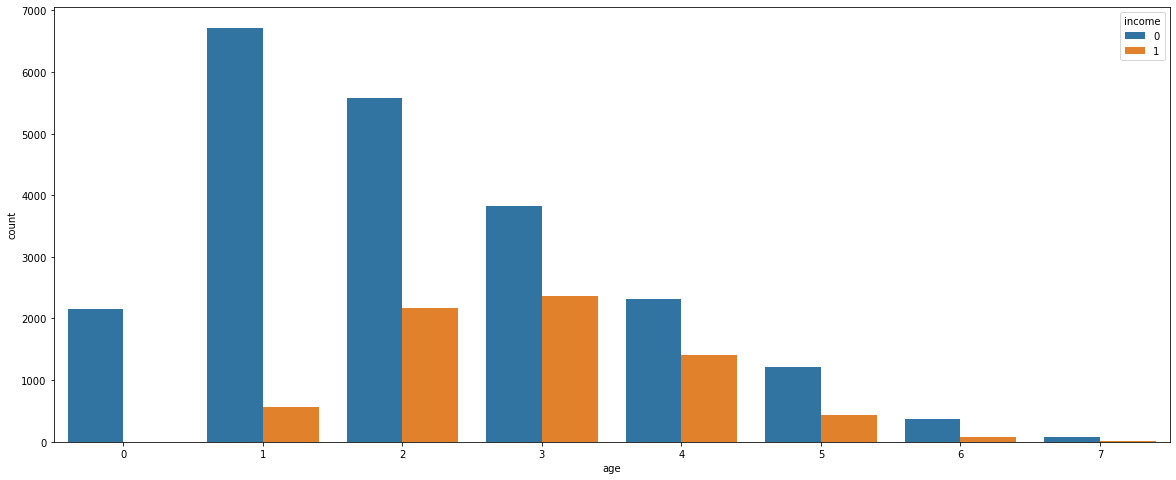

In [496]:
# 나이
plt.figure(figsize = (20,8))
sns.countplot(data = train,
              x = 'age',
              hue = 'income')
# 30,40대에 연간 개인 수입이 $50k 달러 초과 하는 경우가 많다
# 어느정도 나이가 들어 자리 잡았을때 개인 수입이 늘어난다고 분석해볼수 있음

In [497]:
train['age'].unique()

array([1, 2, 5, 4, 3, 0, 6, 7])

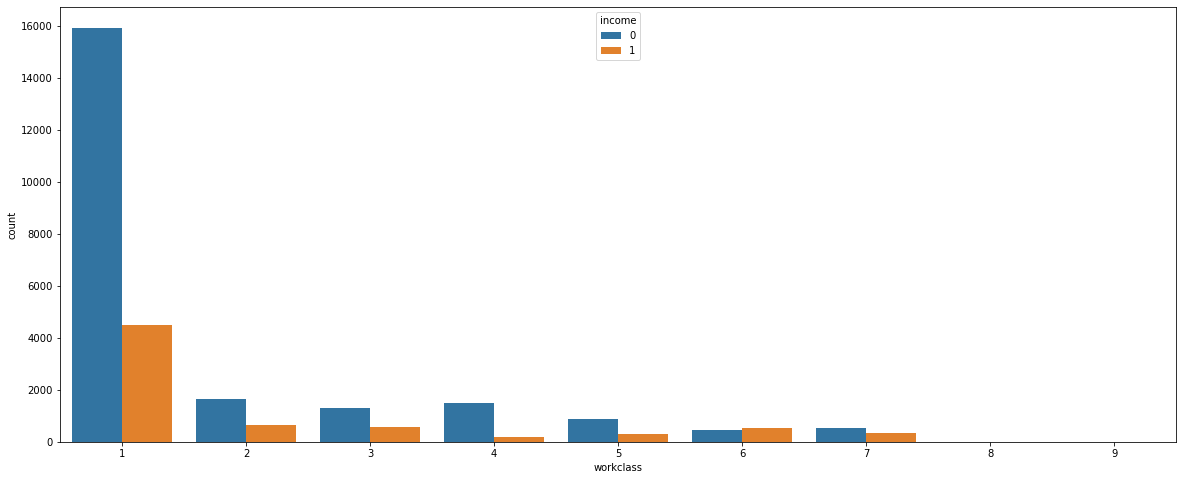

In [498]:
# workclass
plt.figure(figsize = (20,8))
sns.countplot(data = train,
              x = 'workclass',
              hue = 'income')

In [499]:
train['education-num'].unique()

array([ 7, 10, 13, 11,  5,  9, 14,  3, 15,  8,  6, 12, 16,  4,  2,  1])

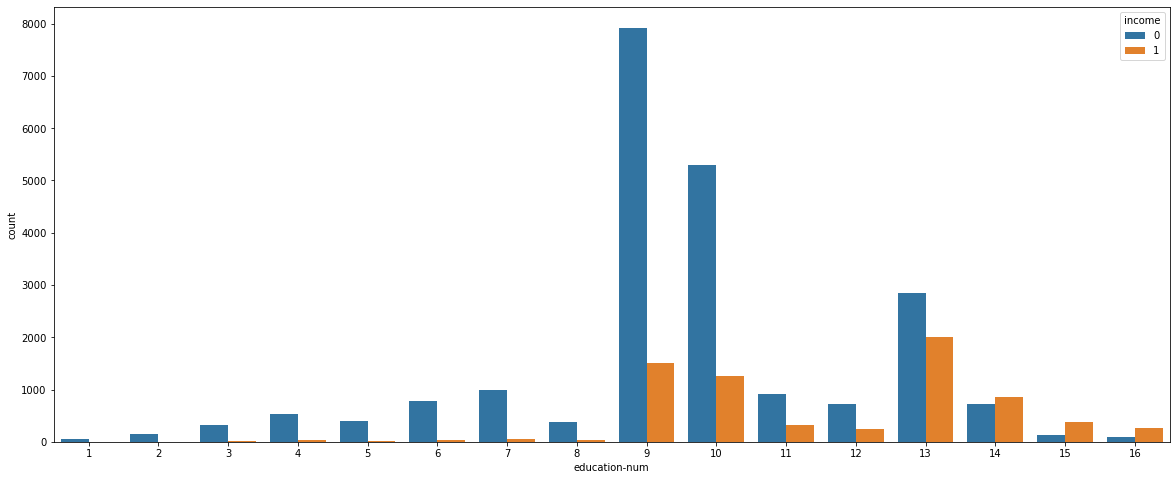

In [500]:
# 연속 학력
plt.figure(figsize = (20,8))
sns.countplot(data = train,
              x = 'education-num',
              hue = 'income')

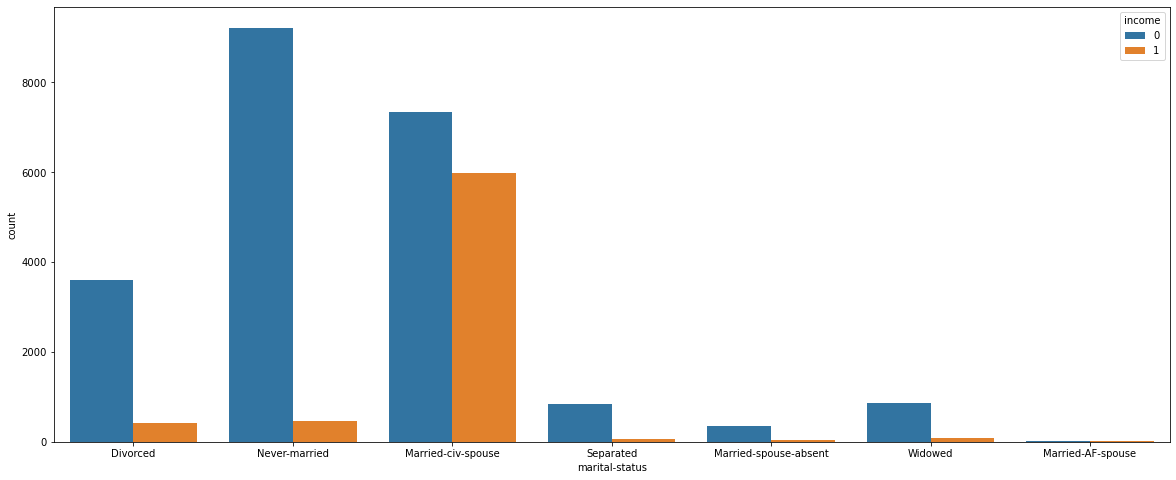

In [501]:
# 결혼 여부
plt.figure(figsize = (20,8))
sns.countplot(data = train,
              x = 'marital-status',
              hue = 'income')

In [502]:
train['marital-status'].unique()

array(['Divorced', 'Never-married', 'Married-civ-spouse', 'Separated',
       'Married-spouse-absent', 'Widowed', 'Married-AF-spouse'],
      dtype=object)

In [503]:
test['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [504]:
train['marital-status'].replace('Divorced','1', inplace = True)
train['marital-status'].replace('Never-married','1', inplace = True)
train['marital-status'].replace('Married-civ-spouse','2', inplace = True)
train['marital-status'].replace('Separated','3', inplace = True)
train['marital-status'].replace('Married-spouse-absent','3', inplace = True)
train['marital-status'].replace('Widowed','3', inplace = True)
train['marital-status'].replace('Married-AF-spouse','4', inplace = True)

In [505]:
test['marital-status'].replace('Divorced','1', inplace = True)
test['marital-status'].replace('Never-married','1', inplace = True)
test['marital-status'].replace('Married-civ-spouse','2', inplace = True)
test['marital-status'].replace('Separated','3', inplace = True)
test['marital-status'].replace('Married-spouse-absent','3', inplace = True)
test['marital-status'].replace('Widowed','3', inplace = True)
test['marital-status'].replace('Married-AF-spouse','4', inplace = True)

In [506]:
train['marital-status']=train['marital-status'].map({'1':1,'2':2,'3':3,
                            '4':4})
test['marital-status']=test['marital-status'].map({'1':1,'2':2,'3':3,
                            '4':4})

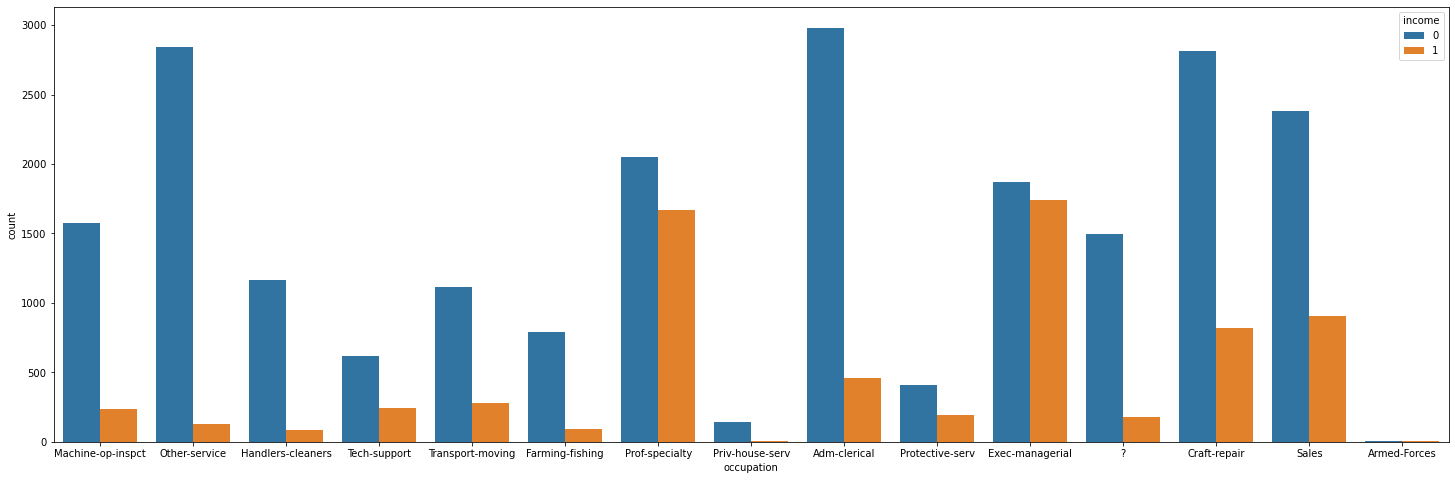

In [507]:
# 직업
plt.figure(figsize = (25,8))
sns.countplot(data = train,
              x = 'occupation',
              hue = 'income')

In [508]:
train['occupation']=train['occupation'].map({'Machine-op-inspct' : 1, 'Other-service' : 2, 'Handlers-cleaners' : 3,
       'Tech-support' : 4, 'Transport-moving' : 5, 'Farming-fishing' : 6,
       'Prof-specialty' : 7, 'Priv-house-serv' : 8, 'Adm-clerical' : 9,
       'Protective-serv' : 10, 'Exec-managerial' : 11, '?' : 12, 'Craft-repair' : 13, 'Sales' : 14,
       'Armed-Forces' : 15})
test['occupation']=test['occupation'].map({'Machine-op-inspct' : 1, 'Other-service' : 2, 'Handlers-cleaners' : 3,
       'Tech-support' : 4, 'Transport-moving' : 5, 'Farming-fishing' : 6,
       'Prof-specialty' : 7, 'Priv-house-serv' : 8, 'Adm-clerical' : 9,
       'Protective-serv' : 10, 'Exec-managerial' : 11, '?' : 12, 'Craft-repair' : 13, 'Sales' : 14,
       'Armed-Forces' : 15})

In [509]:
train['relationship'].unique()

array(['Not-in-family', 'Husband', 'Unmarried', 'Other-relative',
       'Own-child', 'Wife'], dtype=object)

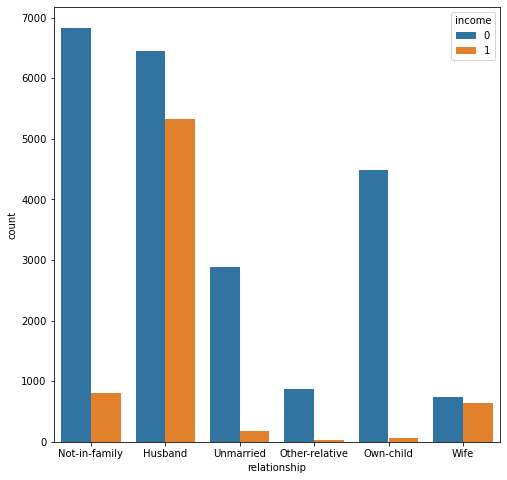

In [510]:
# 가족관계
plt.figure(figsize = (8,8))
sns.countplot(data = train,
              x = 'relationship',
              hue = 'income')

In [511]:
train['relationship']=train['relationship'].map({'Not-in-family' : 1, 'Husband' : 2, 'Unmarried' : 1, 'Other-relative' : 1,
       'Own-child' : 1, 'Wife' : 2})
test['relationship']=test['relationship'].map({'Not-in-family' : 1, 'Husband' : 2, 'Unmarried' : 1, 'Other-relative' : 1,
       'Own-child' : 1, 'Wife' : 2})

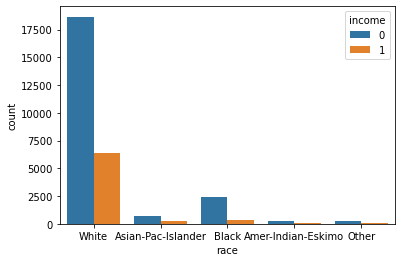

In [450]:
# 인종
sns.countplot(data = train,
              x = 'race',
              hue = 'income')

In [513]:
train['race']=train['race'].map({'White':0,'Black':1,'Asian-Pac-Islander':2,'Amer-Indian-Eskimo':3,
                            'Other':4})
test['race']=test['race'].map({'White':0,'Black':1,'Asian-Pac-Islander':2,'Amer-Indian-Eskimo':3,
                            'Other':4})

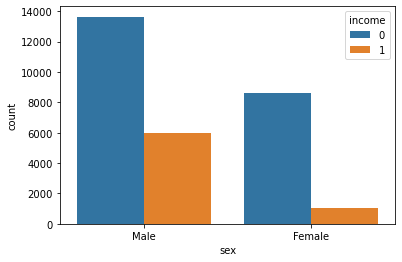

In [451]:
# 성별
sns.countplot(data = train,
              x = 'sex',
              hue = 'income')

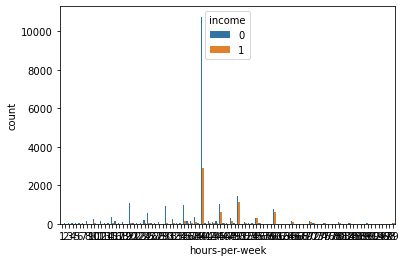

In [452]:
# 주간 근무시간
sns.countplot(data = train,
              x = 'hours-per-week',
              hue = 'income')

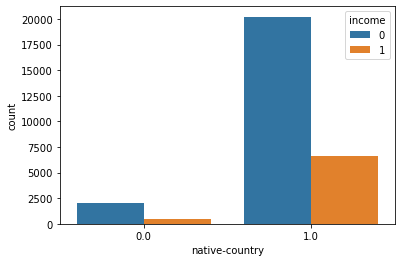

In [453]:
# 국가
sns.countplot(data = train,
              x = 'native-country',
              hue = 'income')

In [454]:
# 오늘 기록

- 데이터 전처리
- 필요없다 생각되는 컬럼 삭제('no')
- ? 부분 다른 최다치 데이터로 채워줌(occupation의 경우 확실한 최다치 데이터가 없어서, 다 고르게 분포되어있어서, 못채워줌)
- 데이터 시각화 해서 확인해봄
- 소득과 지출 차이 이용해서 새로운 컬럼(howmuch)만들었는데 맞는건지 모르겠어서

SyntaxError: invalid syntax (<ipython-input-454-55bb8350c6e2>, line 3)

# 1월 17일

### 오늘 목표
- occupation의 ? 데이터 다른 데이터로 채우기
- 수치화데이터로 만들기 위해 원핫 인코딩 이용해 보기
- age 컬럼 범주화 하기(10대, 20대, 30대...)
- ? 부분 국가는 미국 1, 나머지 0으로 수치화후 ? 부분은 널값들어가 있으니 중앙값으로 채우기
- 가족관계는 허즈밴드, 와이프는 1 나머지 0으로 인코딩
- 

### 트리모델 사용해 보기

In [536]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state = 5)
# X_train, Y_train 을 통해 학습
# X_val, Y_val 을 통해 점수 출력

In [537]:
# KNN 분류모델
from sklearn.neighbors import KNeighborsClassifier
# DecisionTree 분류모델
from sklearn.tree import DecisionTreeClassifier

In [538]:
knn_model = KNeighborsClassifier()
tree_model = DecisionTreeClassifier()

In [539]:
X_train

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,capital
27928,2,1,98389,7,2,6,2,0,0,40,1,0
9182,2,5,223725,12,2,7,2,0,0,65,1,0
28416,1,1,249315,10,1,14,1,0,0,44,1,0
10235,3,7,191013,13,3,7,1,3,1,40,1,0
11504,2,3,252217,8,2,6,2,0,0,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3046,0,1,114828,8,1,1,1,0,0,4,1,0
26301,2,1,175681,13,2,7,2,1,0,60,1,0
20463,1,1,193050,10,1,9,1,0,1,18,1,0
18638,1,1,153475,13,1,14,1,0,1,40,1,0


In [ ]:
## knn

In [540]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [541]:
sc = knn_model.score(X_train, y_train)
print("훈련 정확도 : ", sc)

훈련 정확도 :  0.8301938301938302


In [551]:
knn_pre = tree_model.predict(X_test)

In [552]:
submission['income'] = knn_pre # 원래 양식의 income자리에 내가 예상한 값인 tree_pre를 대입해준다

In [553]:
submission.to_csv('my4Submission.csv', index = False) 
# index = False를 해줘야 앞에 0~19536이라는 인덱스가 사라져서 제출 양식에 맞게 된다.
# 붙어 있으면 제출 양식에 맞지 않다.

In [542]:
## tree

In [543]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [544]:
sc2 = tree_model.score(X_train, y_train)
print("훈련 정확도 : ", sc2)

훈련 정확도 :  0.9998179998179998


In [545]:
tree_pre = tree_model.predict(X_test)

In [546]:
tree_pre

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [547]:
submission['income'] = tree_pre # 원래 양식의 income자리에 내가 예상한 값인 tree_pre를 대입해준다

In [548]:
submission

,no,income
0,29306,0
1,29307,0
2,29308,0
3,29309,0
4,29310,1
...,...,...
19532,48838,1
19533,48839,0
19534,48840,0
19535,48841,0


In [549]:
submission.to_csv('myThirdSubmission.csv', index = False) 
# index = False를 해줘야 앞에 0~19536이라는 인덱스가 사라져서 제출 양식에 맞게 된다.
# 붙어 있으면 제출 양식에 맞지 않다.

## 앙상블

In [554]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [555]:
forest_model = RandomForestClassifier()
gradient_model = GradientBoostingClassifier()

In [556]:
# forest 특성
# max_depth
# n_estimators
# max_features
# max_leaf_nodes

In [557]:
X_train.shape, y_train.shape

((21978, 12), (21978,))

In [558]:
forest_model.fit(X_train, y_train)
forest_model.score(X_train, y_train)

0.9997724997724998

In [560]:
forest_model.score(X_val, y_val)

0.8505527501023611

In [572]:
forest_pre = forest_model3.predict(X_test)

In [573]:
submission['income'] = forest_pre # 원래 양식의 income자리에 내가 예상한 값인 tree_pre를 대입해준다

In [574]:
submission.to_csv('my6Submission.csv', index = False) 
# index = False를 해줘야 앞에 0~19536이라는 인덱스가 사라져서 제출 양식에 맞게 된다.
# 붙어 있으면 제출 양식에 맞지 않다.

In [564]:
forest_model2 = RandomForestClassifier(n_estimators = 1000,
                                       max_features = 0.7,
                                       max_depth = 5,
                                       max_leaf_nodes = 50)

In [566]:
forest_model2.fit(X_train, y_train)
forest_model2.score(X_train, y_train)

0.8508053508053508

In [568]:
forest_model2.score(X_val, y_val)

0.8427733042172786

In [571]:
forest_model3 = RandomForestClassifier(n_estimators = 10000,
                                       max_features = 7,
                                       max_depth = 50,
                                       max_leaf_nodes = 500)

forest_model3.fit(X_train, y_train)
print(forest_model3.score(X_train, y_train))
print(forest_model3.score(X_val, y_val))

0.9142779142779143
0.8575133069469087


In [570]:
forest_model3 = RandomForestClassifier(n_estimators = 100,
                                       max_features = 0.07,
                                       max_depth = 0.5,
                                       max_leaf_nodes = 5)

forest_model3.fit(X_train, y_train)
print(forest_model3.score(X_train, y_train))
print(forest_model3.score(X_val, y_val))

0.7598052598052598
0.7589736590691961


In [ ]:
# 그리드

In [575]:
from sklearn.model_selection import GridSearchCV

In [576]:
param_grid = {
    'max_depth' : [5, 10, 15, 20],
    'n_estimators' : [1000, 1500, 2000, 2500],
    'max_features' : [0.5, 0.7],
    'max_leaf_nodes' : [20, 50, 80]
}

In [577]:
grid = GridSearchCV(forest_model3, param_grid, cv = 3) # 3겹의 교차검증도 같이 진행
grid.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
print('best score : ', grid.best_score_)
print('best params : ', grid.best_params_)

In [578]:
# gradient_model
gradient_model.fit(X_train, y_train)
gradient_model.score(X_train, y_train)

0.8694148694148695

In [579]:
gradient_model.score(X_val, y_val)

0.8622901596833629

In [580]:
gradient_pre = gradient_model.predict(X_test)

In [581]:
submission['income'] = gradient_pre # 원래 양식의 income자리에 내가 예상한 값인 tree_pre를 대입해준다

In [582]:
submission.to_csv('my7Submission.csv', index = False)

### 교차검증 적용 해보기

In [584]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [589]:
cross_val_score(gradient_model, X_train, y_train, cv = 5)

array([0.86305732, 0.87010919, 0.86191993, 0.86416382, 0.86643914])

In [593]:
cross_val_score(gradient_model, X_train, y_train, cv = 5).mean()

0.865092384120014